In [2]:
import pandas as pd

# Load dataset with correct separator
data = pd.read_csv("student-mat.csv", sep=";")

# Show first 5 rows
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.shape


(395, 33)

In [4]:
data.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
data["G3"].describe()


count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [6]:
data["risk"] = data["G3"] < 10

data["risk"].value_counts()


risk
False    265
True     130
Name: count, dtype: int64

In [7]:
data.groupby("risk")[["studytime", "failures", "absences"]].mean()


,studytime,failures,absences
risk,,,
False,2.079245,0.158491,5.192453
True,1.946154,0.692308,6.761538


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Select features
X = data[["studytime", "failures", "absences"]]

# Target variable
y = data["risk"]

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

# Check accuracy
model.score(X_test, y_test)


0.7215189873417721

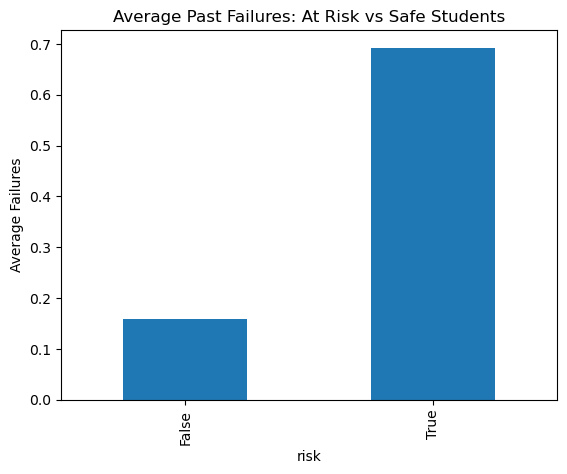

In [9]:
import matplotlib.pyplot as plt

data.groupby("risk")["failures"].mean().plot(kind="bar")
plt.title("Average Past Failures: At Risk vs Safe Students")
plt.ylabel("Average Failures")
plt.show()
